# Drexel University
## College of Computing and Informatics
## INFO 212: Data Science Programming I
## Assignment 3
### Due Date: Sunday, Jun 1st, 2025
### This assignment counts for 15% of the final grade

### A. Assignment Overview
This assignment provides the opportunity for you to practice with Python data analysis skills.

### B. What to Hand In

Sumbit a completed this Jupyter notebook.

### C. How to Hand In

Submit your Jupyter notebook file through the course website in the Blackboard Learn system.

### D. When to Hand In

1. Submit your assignment no later than 11:59pm in the due date.
2. There will be a 10% (absolute value) deduction for each day of lateness, to a maximum of 3 days; assignments will not be accepted beyond that point. Missing work will earn a zero grade.

### E. Written Presentation Requirements (if applicable)
Images must be clear and legible. Assignments will be judged on the basis of visual appearance, grammatical correctness, and quality of writing, as well as their contents. Please make sure that the text of your assignments is well-structured, using paragraphs, full sentences, and other features of well-written presentation.


# Your Name: Alexey Kuraev

## Question 1 [20 marks]: Wikipedia has a Webpage: [List of countries by past and future population](https://en.wikipedia.org/wiki/List_of_countries_by_past_and_future_population). On this page, there are three tables containing the estimated populations from 1950 to 2050 for all the countries. Read the description on the Webpage to understand the information in the tables. Write Python code to use `requests` to read in the tables. Write programs to answer the following questions.
1. How many tables have you read in? List the columns of the DataFrames that contain the population data.
2.For each population DataFrame, rename the column names of average annual growth to meaningful and unique names.
3. Create a DataFrame containing all the data from the population tables. i.e., the DataFrame contains the popultation and average annual growth data from 1950-2050. You need to combine the three population tables. How many rows and columns in the final combined DataFrame?
4. For the top 10 most populous countries at 1950, plot their population data from 1950-2050 (in 5-year interval). The plot should use years 1950-2050 as x axis, and population numbers as y axis. The following figure shows the expected result.
5. For the same top 10 most populous contries at 1950, plot the average annual growth for each previous five-year period starting from 1955 to 2050 in 5-year interval. The following figure shows the expected result.
6. Map country names to their continents and add a 'continent' column storing the continent names corresponding to the countries. Plot the mean population and average annual growth over the years (1950-2050) for all continents.
7. What are the top 5 countries with the highest population growth rate from 1950 to 2020? How does this compare to their projected growth rates from 2020 to 2050? Discuss any notable differences and other factors that should be also considered together with the historical growth data to predict future population changes.

## Answers:

1. How many tables have you read in? List the columns of the DataFrames that contain the population data.


In [ ]:
import requests #imports
import pandas as pd 
import re 

url = "https://en.wikipedia.org/wiki/List_of_countries_by_past_and_projected_future_population#Estimates_between_the_years_1950_and_1980_(in_thousands)"
res = requests.get(url)
tables = pd.read_html(res.text) #getting the tables from the url

print(f"Number of tables: {len(tables)}\n") #number of tables we got

pop_tables = tables[1:4] #grab the tables we care about

print(f"Number of population tables: {len(pop_tables)}\n") #number of population tables we got


for i, df in enumerate(pop_tables, start=1): #prints all the column names of the tables that got population data
    pop_col = [col for col in df.columns if re.match(r"^(19|20)\d{2}$", str(col))]
    print(f"Table {i} population columns: {pop_col}")


df1, df2, df3 = [df for df in pop_tables] #unpacking the tables into 3 dataframes
merged_df = pd.merge(df1, df2, on="Country (or dependent territory)")  #merging the first two dataframes on the common column
combined_df = pd.merge(merged_df, df3, on="Country (or dependent territory)") #merging the third dataframe with the already merged dataframe
rows, cols = combined_df.shape  #getting the shape of the combined dataframe
print(f"\nCombined DataFrame shape: {rows} rows, {cols} columns") #print col and row numbers
combined_df.head()
    

Number of tables: 5

Number of population tables: 3

Table 1 population columns: ['1950', '1955', '1960', '1965', '1970', '1975', '1980']
Table 2 population columns: ['1985', '1990', '1995', '2000', '2005', '2010', '2015']
Table 3 population columns: ['2020', '2025', '2030', '2035', '2040', '2045', '2050']

Combined DataFrame shape: 227 rows, 42 columns


/var/folders/y5/p76rbs_970ncmr_sbfcnmnrw0000gn/T/ipykernel_94330/4194981186.py:7: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(res.text) #getting the tables from the url


Country (or dependent territory)  1950  1955   %_x   1960  %.1_x   1965  \
0                      Afghanistan  8151  8892  1.76   9830   2.03  10998   
1                          Albania  1228  1393  2.56   1624   3.12   1884   
2                          Algeria  8893  9842  2.05  10910   2.08  11964   
3                   American Samoa    20    20  0.72     21   0.20     25   
4                          Andorra     7     7  0.04      9   6.28     14   

   %.2_x   1970  %.3_x  ...   2030   %.2   2035   %.3   2040   %.4   2045  \
0   2.27  12431   2.48  ...  45665  2.12  50195  1.91  54717  1.74  59256   
1   3.02   2157   2.74  ...   3103 -0.01   3063 -0.26   2994 -0.45   2913   
2   1.86  13932   3.09  ...  48149  0.99  50118  0.80  52030  0.75  53894   
3   4.23     28   2.08  ...     53 -0.32     52 -0.45     51 -0.45     50   
4  10.17     20   7.49  ...     85 -0.21     83 -0.30     82 -0.46     79   

    %.5   2050  %.6_y  
0  1.61  63796   1.49  
1 -0.55   2825  -0.61  
2  0.71  55445   0.57  
3 -0.29     50  -0.06  
4 -0.69     75  -0.93  

[5 rows x 42 columns]

2. For each population DataFrame, rename the column names of average annual growth to meaningful and unique names.

In [88]:
cols = list(combined_df.columns) 

growth_cols = [col for col in cols if "%" in str(col)] #gets all the column that have a % in them
for g in growth_cols: #for each column, create an array of all years before it, grab the last two years and rename the column
    i = cols.index(g)
    prev_years = [c for c in cols[:i] if isinstance(c, str) and c.isdigit()]
    if len(prev_years) >= 2:
        y1, y2 = prev_years[-2], prev_years[-1]
        new = f"% change {y1} to {y2}"
        combined_df.rename(columns={g: new}, inplace=True)
        print(f"Renamed column: {g} to {new}")

Renamed column: %_x to % change 1950 to 1955
Renamed column: %.1_x to % change 1955 to 1960
Renamed column: %.2_x to % change 1960 to 1965
Renamed column: %.3_x to % change 1965 to 1970
Renamed column: %.4_x to % change 1970 to 1975
Renamed column: %.5_x to % change 1975 to 1980
Renamed column: %_y to % change 1980 to 1985
Renamed column: %.1_y to % change 1985 to 1990
Renamed column: %.2_y to % change 1990 to 1995
Renamed column: %.3_y to % change 1995 to 2000
Renamed column: %.4_y to % change 2000 to 2005
Renamed column: %.5_y to % change 2005 to 2010
Renamed column: %.6_x to % change 2010 to 2015
Renamed column: % to % change 2015 to 2020
Renamed column: %.1 to % change 2020 to 2025
Renamed column: %.2 to % change 2025 to 2030
Renamed column: %.3 to % change 2030 to 2035
Renamed column: %.4 to % change 2035 to 2040
Renamed column: %.5 to % change 2040 to 2045
Renamed column: %.6_y to % change 2045 to 2050


3. Create a DataFrame containing all the data from the population tables. i.e., the DataFrame contains the popultation and average annual growth data from 1950-2050. You need to combine the three population tables. How many rows and columns in the final combined DataFrame?

In [89]:
print("I did this in the first step as that makes the column renaming easier") #look at 1 
combined_df.head(10) # show the first 10 rows


I did this in the first step as that makes the column renaming easier


Country (or dependent territory)   1950   1955  % change 1950 to 1955  \
0                      Afghanistan   8151   8892                   1.76   
1                          Albania   1228   1393                   2.56   
2                          Algeria   8893   9842                   2.05   
3                   American Samoa     20     20                   0.72   
4                          Andorra      7      7                   0.04   
5                           Angola   4118   4424                   1.44   
6                         Anguilla      6      6                   0.80   
7              Antigua and Barbuda     46     52                   2.19   
8                        Argentina  17151  18928                   1.99   
9                          Armenia   1356   1566                   2.92   

    1960  % change 1955 to 1960   1965  % change 1960 to 1965   1970  \
0   9830                   2.03  10998                   2.27  12431   
1   1624                   3.12   1884                   3.02   2157   
2  10910                   2.08  11964                   1.86  13932   
3     21                   0.20     25                   4.23     28   
4      9                   6.28     14                  10.17     20   
5   4798                   1.64   5135                   1.37   5606   
6      6                   0.79      6                   0.75      7   
7     55                   1.32     60                   1.70     66   
8  20617                   1.72  22284                   1.57  23963   
9   1869                   3.61   2206                   3.37   2520   

   % change 1965 to 1970  ...   2030  % change 2025 to 2030   2035  \
0                   2.48  ...  45665                   2.12  50195   
1                   2.74  ...   3103                  -0.01   3063   
2                   3.09  ...  48149                   0.99  50118   
3                   2.08  ...     53                  -0.32     52   
4                   7.49  ...     85                  -0.21     83   
5                   1.77  ...  29155                   2.58  32910   
6                   0.80  ...     22                   1.58     23   
7                   2.05  ...    110                   0.99    114   
8                   1.46  ...  48796                   0.68  50273   
9                   2.70  ...   2884                  -0.53   2796   

   % change 2030 to 2035   2040  % change 2035 to 2040   2045  \
0                   1.91  54717                   1.74  59256   
1                  -0.26   2994                  -0.45   2913   
2                   0.80  52030                   0.75  53894   
3                  -0.45     51                  -0.45     50   
4                  -0.30     82                  -0.46     79   
5                   2.45  36948                   2.34  41280   
6                   1.41     25                   1.24     26   
7                   0.82    118                   0.65    121   
8                   0.60  51574                   0.51  52663   
9                  -0.62   2699                  -0.71   2590   

   % change 2040 to 2045   2050  % change 2045 to 2050  
0                   1.61  63796                   1.49  
1                  -0.55   2825                  -0.61  
2                   0.71  55445                   0.57  
3                  -0.29     50                  -0.06  
4                  -0.69     75                  -0.93  
5                   2.24  45889                   2.14  
6                   1.09     27                   0.96  
7                   0.52    123                   0.41  
8                   0.42  53512                   0.32  
9                  -0.82   2469                  -0.95  

[10 rows x 42 columns]

4. For the top 10 most populous countries at 1950, plot their population data from 1950-2050 (in 5-year interval). The plot should use years 1950-2050 as x axis, and population numbers as y axis. The following figure shows the expected result: ![](https://i.imgur.com/6W9RuZO.png)

In [90]:
import matplotlib.pyplot as plt

filtered = combined_df[combined_df["Country (or dependent territory)"] != "World"] #get rid of the world row
top10 = filtered.nlargest(10, "1950") #grab the top 10 countries by population in 1950
years = [str(year) for year in range(1950, 2055, 5)] #years from 1950 to 2050 in 5 year increments

pop_cols = [c for c in top10.columns if c in years] #population columns corresponding to the years


plt.figure(figsize=(12, 8)) #plotting
for _, country in top10.iterrows():
    vals = country[pop_cols].astype(float)
    plt.plot(years, vals, marker='o', label=country["Country (or dependent territory)"])

plt.title("Population Growth of Top 10 Countries (1950-2055)")
plt.xlabel("Year")
plt.ylabel("Population (in thousands)")
plt.xticks(years, rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()



5. For the same top 10 most populous contries at 1950, plot the average annual growth for each previous five-year period starting from 1955 to 2050 in 5-year interval. The following figure shows the expected result: ![](https://i.imgur.com/ImXjIo0.png)

In [53]:
growth_cols = [col for col in top10.columns if "% change" in str(col)] #gets all the columns that have % change in them

growth_years = years[1:] #years - 1950


plt.figure(figsize=(12, 8)) #plotting
for _, country in top10.iterrows(): 
    vals = country[growth_cols].astype(float)
    plt.plot(growth_years, vals, marker='o', label=country["Country (or dependent territory)"])

plt.title("Population Growth Rate of Top 10 Countries (1950-2055)")
plt.xlabel("Year")
plt.ylabel("Population Growth Rate (%)")
plt.xticks(growth_years, rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

6. Map country names to their continents and add a 'continent' column storing the continent names corresponding to the countries. Plot the mean population and average annual growth over the years (1950-2050) for all continents.
- Hint: install the pycountry_convert package and use its methods for converting country names to continent names: https://pypi.org/project/pycountry-convert/

/var/folders/y5/p76rbs_970ncmr_sbfcnmnrw0000gn/T/ipykernel_94330/140839845.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered["continent"] = filtered["Country (or dependent territory)"].apply(countryToContinent) #apply the function to the dataframe


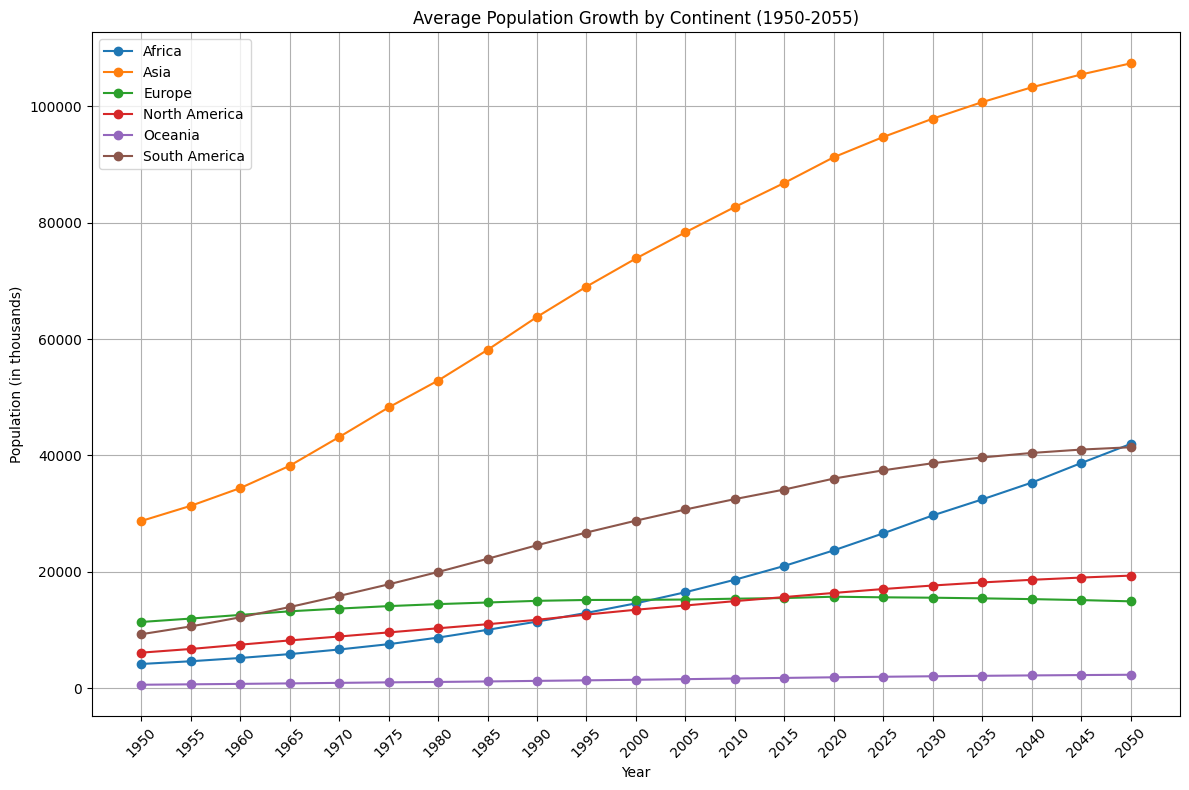

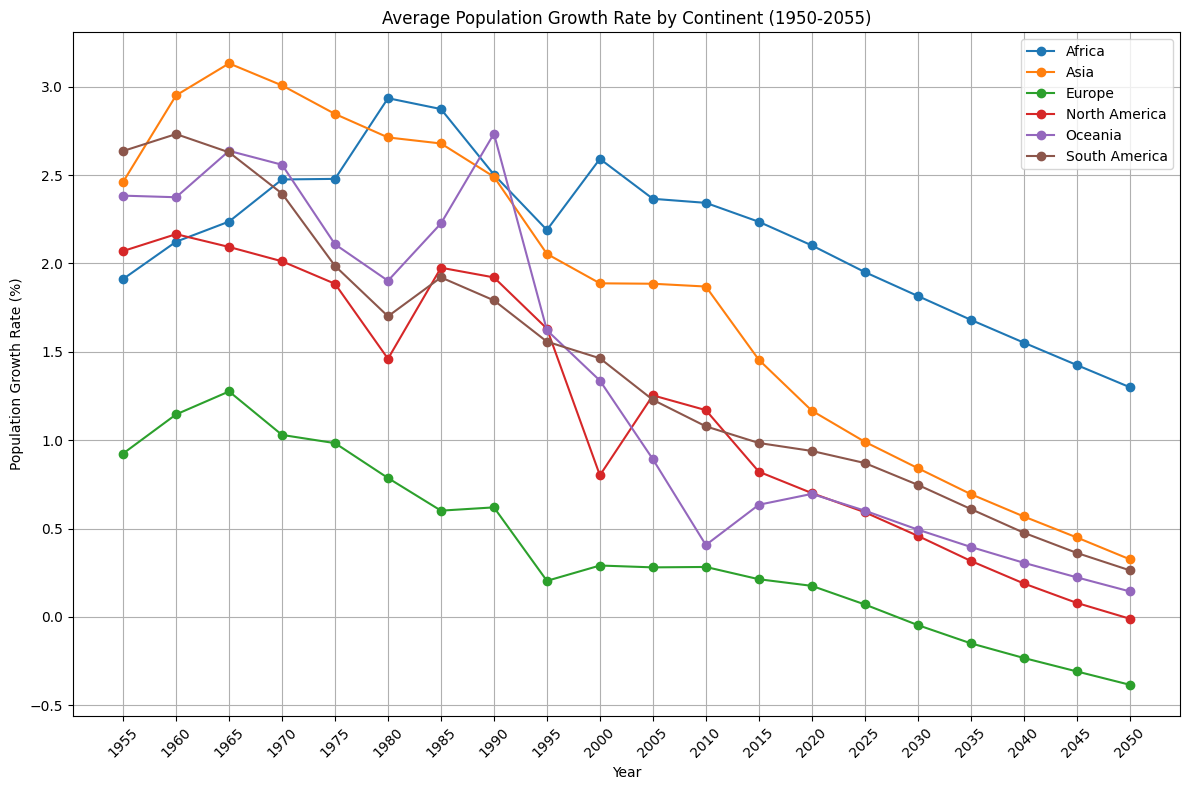

In [54]:
import pycountry_convert as pc 

def countryToContinent(name): #function to convert country names to continent names
    try:
        alpha2 = pc.country_name_to_country_alpha2(name)
        code = pc.country_alpha2_to_continent_code(alpha2)
        return pc.convert_continent_code_to_continent_name(code)
    except Exception:
        return None

filtered["continent"] = filtered["Country (or dependent territory)"].apply(countryToContinent) #apply the function to the dataframe


years = [str(year) for year in range(1950, 2055, 5)] #the years
pop_cols = [c for c in filtered.columns if c in years] #the population columns

growth_cols = [c for c in filtered.columns if "% change" in str(c)] #the growth columns
growth_years = years[1:] #the growth years

cont_pop_mean = filtered.groupby("continent")[years].mean() #average population by continent
cont_growth_mean = filtered.groupby("continent")[growth_cols].mean() #average growth by continent

plt.figure(figsize=(12, 8)) #plotting
for cont in cont_pop_mean.index:
    plt.plot(years, cont_pop_mean.loc[cont].values, marker='o', label=cont)
plt.title("Average Population Growth by Continent (1950-2055)")
plt.xlabel("Year")
plt.ylabel("Population (in thousands)")
plt.xticks(years, rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 8)) #plotting
for cont in cont_growth_mean.index:
    plt.plot(growth_years, cont_growth_mean.loc[cont].values, marker='o', label=cont)
plt.title("Average Population Growth Rate by Continent (1950-2055)")
plt.xlabel("Year")
plt.ylabel("Population Growth Rate (%)")
plt.xticks(growth_years, rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


7. What are the top 5 countries with the highest population growth rate from 1950 to 2020? How does this compare to their projected growth rates from 2020 to 2050? Discuss any notable differences and other factors that should be also considered together with the historical growth data to predict future population changes.

In [ ]:
df7 = filtered[filtered["Country (or dependent territory)"] != "World"] #we want only countries

df7.head(10)

df7["ann_growth_1950_2020"] = (df7["2020"]/df7["1950"])**(1/70) - 1 #CAGR formula calculation 
df7["ann_growth_2020_2050"] = (df7["2050"]/df7["2020"])**(1/30) - 1

df7["ann_growth_1950_2020"] *= 100 #convert to percentage
df7["ann_growth_2020_2050"] *= 100

top5 = df7.nlargest(5, "ann_growth_1950_2020")[ #make a new dataframe with the top 5 countries
    ["Country (or dependent territory)", "ann_growth_1950_2020", "ann_growth_2020_2050"]
].reset_index(drop=True)

print("\nTop 5 countries with highest annual growth rate from 1950 to 2020:")
print(top5)

print("\nAs we can see, the population growth rate is decreasing across the board for all countries across all continents.")
print("\nThis is a clear indicator of the fact that the world population growth rate is decreasing.")
print("\nSpecifically for the top 5 countries growth rate fomr 1950 to 2020, the growth rate decease is substantial dropping from 6& to 3% for the top 5 countries.")
print("\nThings to consider are the birth rate, urbanization, and the general feeling that people are having less children as the priority shits to education and careers.")


Top 5 countries with highest annual growth rate from 1950 to 2020:
  Country (or dependent territory)  ann_growth_1950_2020  ann_growth_2020_2050
0                            Qatar              6.706304              0.152020
1             United Arab Emirates              6.643171              0.704561
2                   Western Sahara              6.151792              1.974558
3                           Kuwait              4.420088              0.853934
4                     Sint Maarten              3.911084              0.684983

As we can see, the population growth rate is decreasing across the board for all countries across all continents.

This is a clear indicator of the fact that the world population growth rate is decreasing.

Specifically for the top 5 countries growth rate fomr 1950 to 2020, the growth rate decease is substantial dropping from 6& to 3% for the top 5 countries.

Things to consider are the birth rate, urbanization, and the general feeling that people are h

## Question 2 [40 marks]: The link: https://yuan-json-api.vercel.app/nobelprize/laureates is a RESTful API endpoint that returns information in JSON about Nobel Prize Laureates. Write Python code to use `requests` to call the RESTful API and read the JSON results. Write program to answer the following questions.
1. Create a Pandas DataFrame containing the laureates information along with the information about their prizes and afflications in flat format. How many unique laureates are in the data set?

2. Develop two distinct methods to identify laureates who have been awarded Nobel prizes more than once, whether in different years or in different categories. Present your findings in a clear and organized manner. This could be displayed in a table format (like a pandas DataFrame).

 - Two separate and distinct approaches could be different algorithmic strategies, Python code, or data structures. For each approach, You need to provide a detailed explanation of the logic behind each method. The explanation should be in the form of comments within your code or as a separate written text accompanying your code.

3. Develop two distinct methods to list the top 5 afiliations by the number of awards. Show the laureates, prizes, and affiliations information. Present your findings in a clear and organized manner. This could be displayed in a table format (like a pandas DataFrame).
 - Two separate and distinct approaches could be using different algorithmic strategies, Python code, or data structures For each approach, you need to provide a detailed explanation of the logic behind each method. The explanation should be in the form of comments within your code or as a separate written text accompanying your code.

4. For the top 5 affiliations, develop two distinct visualizations to represent the counts of each Nobel prize category associated with these affiliations.

 - Two different types of plots could be bar chart, pie chart, line graph, etc. You also could choose to present the information in a single comprehensive figure or multiple figures for each affiliation.

## Answers:

1. Create a Pandas DataFrame containing the laureates information along with the information about their prizes and afflications in flat format. How many unique laureates are in the data set?

In [91]:
import requests

url = 'https://yuan-json-api.vercel.app/nobelprize/laureates' #the url 
response = requests.get(url) #fetch the data 
response.raise_for_status()
data = response.json() #check if the data is valid

rows = [] #flatten the data into a list of dictionaries
for laureate in data['laureates']:
    for prize in laureate.get('prizes', []):
        affs = prize.get('affiliations', []) or [{}]
        for aff in affs:
            aff = aff if isinstance(aff, dict) else {}
            rows.append({
                'id': laureate.get('id'),
                'firstname': laureate.get('firstname'),
                'surname': laureate.get('surname'),
                'born': laureate.get('born'),
                'died': laureate.get('died'),
                'bornCountry': laureate.get('bornCountry'),
                'bornCountryCode': laureate.get('bornCountryCode'),
                'bornCity': laureate.get('bornCity'),
                'diedCountry': laureate.get('diedCountry'),
                'diedCountryCode': laureate.get('diedCountryCode'),
                'diedCity': laureate.get('diedCity'),
                'gender': laureate.get('gender'),
                'prize_year': prize.get('year'),
                'prize_category': prize.get('category'),
                'prize_share': prize.get('share'),
                'prize_motivation': prize.get('motivation'),
                'affiliation_name': aff.get('name'),
                'affiliation_city': aff.get('city'),
                'affiliation_country': aff.get('country'),
            })


df = pd.DataFrame(rows) #from the list of dictionaries, create a dataframe


num_unique = df['id'].nunique() #get the number of unique laureates
print(f"Number of unique laureates: {num_unique}") #print the number of unique laureates

df.head(10) #show the first 10 rows of the dataframe

Number of unique laureates: 922


id             firstname                surname        born        died  \
0   1        Wilhelm Conrad                Röntgen  1845-03-27  1923-02-10   
1   2        Hendrik Antoon                Lorentz  1853-07-18  1928-02-04   
2   3                Pieter                 Zeeman  1865-05-25  1943-10-09   
3   4         Antoine Henri              Becquerel  1852-12-15  1908-08-25   
4   5                Pierre                  Curie  1859-05-15  1906-04-19   
5   6                 Marie  Curie, née Sklodowska  1867-11-07  1934-07-04   
6   6                 Marie  Curie, née Sklodowska  1867-11-07  1934-07-04   
7   8         Lord Rayleigh  (John William Strutt)  1842-11-12  1919-06-30   
8   9  Philipp Eduard Anton             von Lenard  1862-06-07  1947-05-20   
9  10           Joseph John                Thomson  1856-12-18  1940-08-30   

                   bornCountry bornCountryCode  \
0        Prussia (now Germany)              DE   
1              the Netherlands              NL   
2              the Netherlands              NL   
3                       France              FR   
4                       France              FR   
5  Russian Empire (now Poland)              PL   
6  Russian Empire (now Poland)              PL   
7               United Kingdom              GB   
8       Hungary (now Slovakia)              SK   
9               United Kingdom              GB   

                         bornCity      diedCountry diedCountryCode  \
0          Lennep (now Remscheid)          Germany              DE   
1                          Arnhem  the Netherlands              NL   
2                      Zonnemaire  the Netherlands              NL   
3                           Paris           France              FR   
4                           Paris           France              FR   
5                          Warsaw           France              FR   
6                          Warsaw           France              FR   
7   Langford Grove, Maldon, Essex   United Kingdom              GB   
8      Pressburg (now Bratislava)          Germany              DE   
9  Cheetham Hill, near Manchester   United Kingdom              GB   

       diedCity  gender prize_year prize_category prize_share  \
0        Munich    male       1901        physics           1   
1          None    male       1902        physics           2   
2     Amsterdam    male       1902        physics           2   
3          None    male       1903        physics           2   
4         Paris    male       1903        physics           4   
5    Sallanches  female       1903        physics           4   
6    Sallanches  female       1911      chemistry           1   
7          None    male       1904        physics           1   
8  Messelhausen    male       1905        physics           1   
9     Cambridge    male       1906        physics           1   

                                    prize_motivation  \
0  "in recognition of the extraordinary services ...   
1  "in recognition of the extraordinary service t...   
2  "in recognition of the extraordinary service t...   
3  "in recognition of the extraordinary services ...   
4  "in recognition of the extraordinary services ...   
5  "in recognition of the extraordinary services ...   
6  "in recognition of her services to the advance...   
7  "for his investigations of the densities of th...   
8                     "for his work on cathode rays"   
9  "in recognition of the great merits of his the...   

                                    affiliation_name affiliation_city  \
0                                  Munich University           Munich   
1                                  Leiden University           Leiden   
2                               Amsterdam University        Amsterdam   
3                                École Polytechnique            Paris   
4  École municipale de physique et de chimie indu...            Paris   
5                                               Non

2. Develop two distinct methods to identify laureates who have been awarded Nobel prizes more than once, whether in different years or in different categories. Present your findings in a clear and organized manner. This could be displayed in a table format (like a pandas DataFrame).

 - Two separate and distinct approaches could be different algorithmic strategies, Python code, or data structures. For each approach, You need to provide a detailed explanation of the logic behind each method. The explanation should be in the form of comments within your code or as a separate written text accompanying your code.


In [97]:
from collections import Counter

#Method 1: GroupBy
grouped = ( #using simple groupby to count laureates with multiple prizes
    df
    .groupby(['id', 'firstname', 'surname'], dropna=False)
    .size()
    .reset_index(name='prize_count')
)
method1_df = grouped[grouped['prize_count'] > 1].sort_values('prize_count', ascending=False) #only keep laureates with more than one prize, sorted by count of prizes

#method 2: Counter
id_counts = Counter(df['id']) #count the occurrences of each laureate ID
multi_award_ids = [l_id for l_id, cnt in id_counts.items() if cnt > 1] #select IDs with more than one prize

info_map = { #for each id, map it to the firstname and surname
    laureate['id']: (laureate.get('firstname', ''), laureate.get('surname', ''))
    for laureate in data['laureates']
}

rows2 = [] #create a list of dictionaries for the second method
for l_id in sorted(multi_award_ids, key=lambda x: id_counts[x], reverse=True): #for each id, get the first name and surname from the info_map
    fname, sname = info_map.get(l_id, ('', ''))
    rows2.append({ #append the id, firstname, surname and prize count to the list
        'id': l_id,
        'firstname': fname,
        'surname': sname,
        'prize_count': id_counts[l_id]
    })
method2_df = pd.DataFrame(rows2) #convert the list of dictionaries to a dataframe


print("Method 1 (GroupBy) — laureates with multiple prizes:") #prin the results of both methods
print(method1_df.to_string(index=False))

print("\nMethod 2 (Counter) — laureates with multiple prizes:")
print(method2_df.to_string(index=False))

print("\nBoth methods yield the same result length:") #check if both methods yield the same result length
print(len(method1_df) == len(method2_df))

Method 1 (GroupBy) — laureates with multiple prizes:
 id                                                                         firstname               surname  prize_count
837                                                                           Jack W.               Szostak            3
482 Comité international de la Croix Rouge (International Committee of the Red Cross)                   NaN            3
114                                                                             Abdus                 Salam            2
861                                                                          Bruce A.               Beutler            2
857                                                                           Dale T.             Mortensen            2
846                                                                            Elinor                Ostrom            2
842                                                                         Thomas A.               

3. Develop two distinct methods to list the top 5 afiliations by the number of awards. Show the laureates, prizes, and affiliations information. Present your findings in a clear and organized manner. This could be displayed in a table format (like a pandas DataFrame).
 - Two separate and distinct approaches could be using different algorithmic strategies, Python code, or data structures For each approach, you need to provide a detailed explanation of the logic behind each method. The explanation should be in the form of comments within your code or as a separate written text accompanying your code.

In [110]:
dfa = df

#method 1: groupby 
aff_cnt = (dfa #group by affiliation details and count the number of awards
           .groupby(['affiliation_name','affiliation_city','affiliation_country'])
           .size()
           .reset_index(name='award_count')
           .sort_values('award_count', ascending=False))
top5 = aff_cnt.head(5) #get the top 5 affiliation by award count
m1 = (dfa #merge the top 5 affiliation with the original dataframe to show all of the info needed
      .merge(top5, on=['affiliation_name','affiliation_city','affiliation_country'])
      .sort_values(['award_count','affiliation_name','prize_year'],ascending=[False, False,True]))
print("Method 1: laureates affiliated with the top 5 affiliations") #prints the top 5 affiliations with all of the info needed
display(m1)

#method 2: counter

ctr = Counter((r['affiliation_name'],r['affiliation_city'],r['affiliation_country']) #count the occurences of each affiliation
              for r in rows if r.get('affiliation_name'))
keys5 = [k for k,_ in ctr.most_common(5)] #select the top 5 affiliations
aff_to_count = {k: v for k, v in ctr.items()} #create a mapping of affiliation to count
print(f"Top 5 affiliation keys: {keys5} and numbers: ") # print the top 5 affiliation keys, (Different from the first method as there are ties and Stanford and U of Chicago both have 18)
rows3 = []
for r in rows: #for each row in the df
    aff_tuple = (r.get('affiliation_name'), r.get('affiliation_city'), r.get('affiliation_country')) #create a tuple of the affiliation details
    if aff_tuple in keys5: #if the affiliation is in the top 5 affiliations
        r_copy = r.copy()  #make a copy of that row
        r_copy['award_count'] = aff_to_count[aff_tuple] #add the award count to the row
        rows3.append(r_copy) #append the row to the rows3 list
m2 = pd.DataFrame(rows3).sort_values(['award_count', 'affiliation_name','prize_year'], ascending=[False, False, True]) #create a df from the rows3 list and sort by the number of awards, affiliation name and prize year
print("Method 2: laureates affiliated with the top 5 affiliations")
display(m2)

display(top5) #shows the top 5 form m1

Method 1: laureates affiliated with the top 5 affiliations


id         firstname   surname        born        died bornCountry  \
32  175  Theodore William  Richards  1868-01-31  1928-04-02         USA   
51  327   George Richards     Minot  1885-12-02  1950-02-25         USA   
52  328     William Parry    Murphy  1892-02-06  1987-10-09         USA   
3    51    Percy Williams  Bridgman  1882-04-21  1961-08-20         USA   
65  511             Ralph    Bunche  1904-08-07  1971-12-09         USA   
..  ...               ...       ...         ...         ...         ...   
31  155         Robert B.  Laughlin  1950-11-01  0000-00-00         USA   
79  745        A. Michael    Spence  1943-00-00  0000-00-00         USA   
87  806          Roger D.  Kornberg  1947-04-24  0000-00-00         USA   
93  886         Thomas C.    Südhof  1955-12-22  0000-00-00     Germany   
95  911        William E.   Moerner  1953-06-24  0000-00-00         USA   

   bornCountryCode        bornCity diedCountry diedCountryCode       diedCity  \
32              US  Germantown, PA         USA              US  Cambridge, MA   
51              US      Boston, MA         USA              US  Brookline, MA   
52              US   Stoughton, WI         USA              US  Brookline, MA   
3               US   Cambridge, MA         USA              US   Randolph, NH   
65              US     Detroit, MI         USA              US   New York, NY   
..             ...             ...         ...             ...            ...   
31              US     Visalia, CA        None            None           None   
79              US   Montclair, NJ        None            None           None   
87              US   St. Louis, MO        None            None           None   
93              DE       Göttingen        None            None           None   
95              US  Pleasanton, CA        None            None           None   

   gender prize_year prize_category prize_share  \
32   male       1914      chemistry           1   
51   male       1934       medicine           3   
52   male       1934       medicine           3   
3    male       1946        physics           1   
65   male       1950          peace           1   
..    ...        ...            ...         ...   
31   male       1998        physics           3   
79   male       2001      economics           3   
87   male       2006      chemistry           1   
93   male       2013       medicine           3   
95   male       2014      chemistry           3   

                                     prize_motivation     affiliation_name  \
32  "in recognition of his accurate determinations...   Harvard University   
51  "for their discoveries concerning liver therap...   Harvard University   
52  "for their discoveries concerning liver therap...   Harvard University   
3   "for the invention of an apparatus to produce ...   Harvard University   
65                                               None   Harvard University   
..                                                ...                  ...   
31  "for their discovery of a new form of quantum ...  Stanford University   
79  "for their analyses of markets with asymmetric...  Stanford University   
87  "for his studies of the molecular basis of euk...  Stanford University   
93  "for their discoveries of machinery regulating...  Stanford University   
95  "for the development of super-resolved fluores...  Stanford University   

   affiliation_city affiliation_country  award_count  
32    Cambridge, MA                 USA           27  
51    Cambridge, MA                 USA           27  
52    Cambridge, MA                 USA           27  
3     Cambridge, MA                 USA           27  
65    Cambridge, MA                 USA           27  
..              ...                 ...          ...  
31     Stanford, CA                 USA           18  
79     Stanford, CA                 USA           18  
87     Stanford, CA                 USA           18  
93     Stanford, CA            

Top 5 affiliation keys: [('Harvard University', 'Cambridge, MA', 'USA'), ('California Institute of Technology (Caltech)', 'Pasadena, CA', 'USA'), ('Massachusetts Institute of Technology (MIT)', 'Cambridge, MA', 'USA'), ('University of Chicago', 'Chicago, IL', 'USA'), ('University of California', 'Berkeley, CA', 'USA')] and numbers: 
Method 2: laureates affiliated with the top 5 affiliations


id         firstname     surname        born        died bornCountry  \
27  175  Theodore William    Richards  1868-01-31  1928-04-02         USA   
44  327   George Richards       Minot  1885-12-02  1950-02-25         USA   
45  328     William Parry      Murphy  1892-02-06  1987-10-09         USA   
5    51    Percy Williams    Bridgman  1882-04-21  1961-08-20         USA   
57  511             Ralph      Bunche  1904-08-07  1971-12-09         USA   
..  ...               ...         ...         ...         ...         ...   
78  744         George A.     Akerlof  1940-06-17  0000-00-00         USA   
85  805         George F.       Smoot  1945-02-20  0000-00-00         USA   
87  847         Oliver E.  Williamson  1932-09-27  0000-00-00         USA   
89  864              Saul  Perlmutter  0000-00-00  0000-00-00         USA   
91  885          Randy W.    Schekman  1948-12-30  0000-00-00         USA   

   bornCountryCode              bornCity diedCountry diedCountryCode  \
27              US        Germantown, PA         USA              US   
44              US            Boston, MA         USA              US   
45              US         Stoughton, WI         USA              US   
5               US         Cambridge, MA         USA              US   
57              US           Detroit, MI         USA              US   
..             ...                   ...         ...             ...   
78              US         New Haven, CT        None            None   
85              US             Yukon, FL        None            None   
87              US          Superior, WI        None            None   
89              US  Champaign-Urbana, IL        None            None   
91              US          St. Paul, MN        None            None   

         diedCity gender prize_year prize_category prize_share  \
27  Cambridge, MA   male       1914      chemistry           1   
44  Brookline, MA   male       1934       medicine           3   
45  Brookline, MA   male       1934       medicine           3   
5    Randolph, NH   male       1946        physics           1   
57   New York, NY   male       1950          peace           1   
..            ...    ...        ...            ...         ...   
78           None   male       2001      economics           3   
85           None   male       2006        physics           2   
87           None   male       2009      economics           2   
89           None   male       2011        physics           2   
91           None   male       2013       medicine           3   

                                     prize_motivation  \
27  "in recognition of his accurate determinations...   
44  "for their discoveries concerning liver therap...   
45  "for their discoveries concerning liver therap...   
5   "for the invention of an apparatus to produce ...   
57                                               None   
..                                                ...   
78  "for their analyses of markets with asymmetric...   
85  "for their discovery of the blackbody form and...   
87  "for his analysis of economic governance, espe...   
89  "for the discovery of the accelerating expansi...   
91  "for their discoveries of machinery regulating...   

            affiliation_name affiliation_city affiliation_country  award_count  
27        Harvard University    Cambridge, MA                 USA           27  
44        Harvard University    Cambridge, MA                 USA           27  
45        Harvard University    Cambridge, MA                 USA           27  
5         Harvard University    Cambridge, MA                 USA           27  
57        Harvard University    Cambridge, MA                 USA           27  
..                       ...              ...                 ...          ...  
78  University of California     Berkeley, CA                 USA           18  
85  University of California     Berkeley, CA                 USA           18  
87  Univ

affiliation_name affiliation_city  \
81                             Harvard University    Cambridge, MA   
148   Massachusetts Institute of Technology (MIT)    Cambridge, MA   
30   California Institute of Technology (Caltech)     Pasadena, CA   
252                      University of California     Berkeley, CA   
219                           Stanford University     Stanford, CA   

    affiliation_country  award_count  
81                  USA           27  
148                 USA           19  
30                  USA           19  
252                 USA           18  
219                 USA           18

4. For the top 5 affiliations, develop two distinct visualizations to represent the counts of each Nobel prize category associated with these affiliations.

 - Two different types of plots could be bar chart, pie chart, line graph, etc. You also could choose to present the information in a single comprehensive figure or multiple figures for each affiliation.

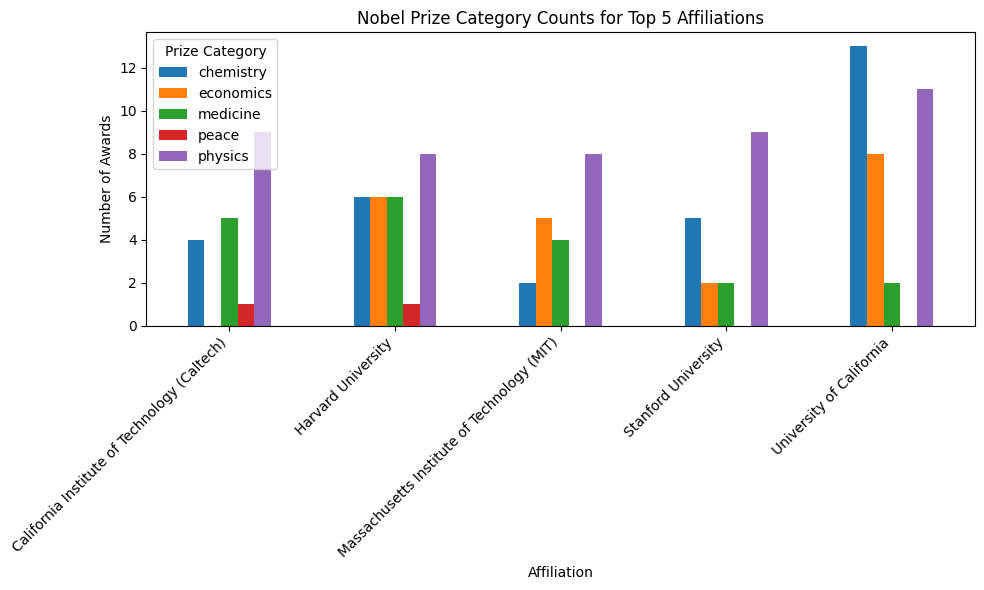

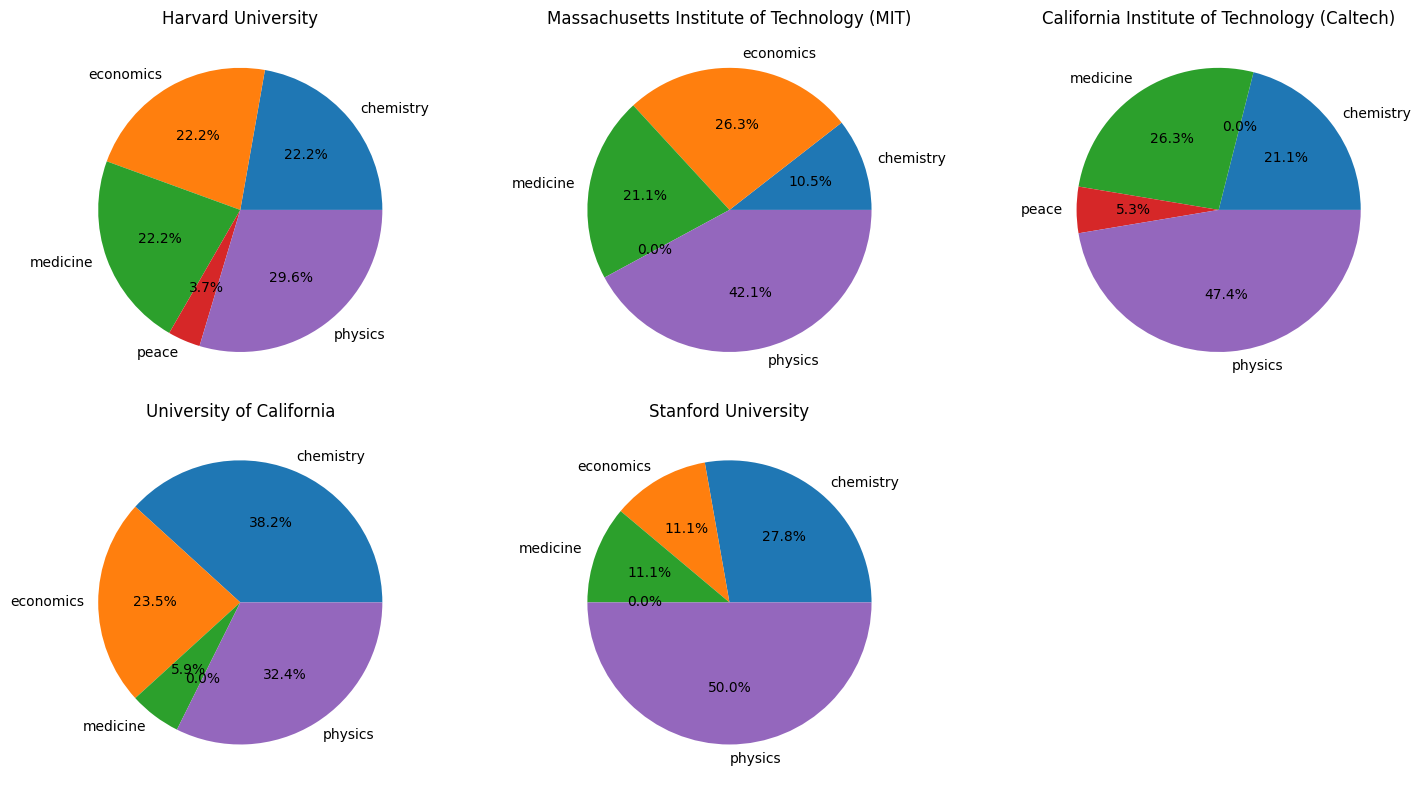

In [123]:

top5_affs = top5['affiliation_name'].tolist() #grab the names of the top 5 affiliations for further analysis


cat_counts = ( #using groupby to count the number of awards in each category for the top 5 affiliations
    df[df['affiliation_name'].isin(top5_affs)]
      .groupby(['affiliation_name', 'prize_category'])
      .size()
      .unstack(fill_value=0)
)

#bar graph visualization, x col is the affiliation name, y col is the number of awards, and the bars are colored by prize category
fig, ax = plt.subplots(figsize=(10, 6))
cat_counts.plot(kind='bar', ax=ax)
ax.set_title('Nobel Prize Category Counts for Top 5 Affiliations')
ax.set_xlabel('Affiliation')
ax.set_ylabel('Number of Awards')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Prize Category')
plt.tight_layout()
plt.show()

#pie chart visualization for the top 5 affiliations, showing the distribution of prize categories for each affiliation
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()  # Flatten to iterate easily

for i, aff in enumerate(top5_affs): #basic loop to plot each affiliation in a pie chart
    if i < len(axes):
        ax = axes[i]
        counts = cat_counts.loc[aff]
        counts.plot(kind='pie', ax=ax, autopct='%1.1f%%', legend=False)
        ax.set_title(aff)
        ax.set_ylabel('')

for j in range(len(top5_affs), len(axes)): #hide an extra plot that shows up
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


## Question 3 [20 marks]: The file `weather-samples.csv` contains weather data measured at a weather station for a period of three years. Sensors at the weather station capture weather-related measurements such as air temperature, air pressure, and relative humidity. Load  the data to a pandas DataFrame. Write code to answer the following questions.

1. How many rows contain missing values?
2. How many columns contain missing values?
3. List the numbers of missing values for all columns.
4. For each missing value, fill up it with the mean value of the column where the missing value is located in.
5. Show there is no missing value after filling up.
6. Plot the histogram of the value `relative_humidity_3pm`.
7. A weather forecast problem is to predict a measure in a future time using the measurements at earlier moments. For example, the data set contains several measurements at 9am and one measurement `relative_humidity_3pm` at 3pm. It is interesting to know whether we can predict `relative_humidity_3pm` using the values at 9am. This is a typical supervised machine learning problem. Using plots to visualize the relationships between the measurements at 9am and `relative_humidity_3pm`. What do you find? Discuss the impacts of the measurements at 9am to the values of `relaive_humidity_3pm`.

## Answers:

1. How many rows contain missing values?

In [125]:
df = pd.read_csv("weather-samples.csv") #load in the weather data

rows_with_missing = df.isna().any(axis=1).sum() #coun the number of rows with missing values
print(f"Rows with missing values: {rows_with_missing}")

Rows with missing values: 31


2. How many columns contain missing values?

In [126]:
cols_with_missing = df.isna().any(axis=0).sum() #count the number of columns with missing values
print(f"Columns with missing values: {cols_with_missing}")

Columns with missing values: 8


3. List the numbers of missing values for all columns.

In [127]:
missing_per_col = df.isna().sum() #count the number of missing values per column
print(f"Missing values per column:\n{missing_per_col}")

Missing values per column:
number                    0
air_pressure_9am          3
air_temp_9am              5
avg_wind_direction_9am    4
avg_wind_speed_9am        3
max_wind_direction_9am    3
max_wind_speed_9am        4
rain_accumulation_9am     6
rain_duration_9am         3
relative_humidity_9am     0
relative_humidity_3pm     0
dtype: int64


4. For each missing value, fill up it with the mean value of the column where the missing value is located in.

In [128]:
df.fillna(df.mean(numeric_only=True), inplace=True) #fill missing values with the mean of the column
df.head(10)

missing_per_col = df.isna().sum() #recount the number of missing values per column after filling
print(missing_per_col)

number                    0
air_pressure_9am          0
air_temp_9am              0
avg_wind_direction_9am    0
avg_wind_speed_9am        0
max_wind_direction_9am    0
max_wind_speed_9am        0
rain_accumulation_9am     0
rain_duration_9am         0
relative_humidity_9am     0
relative_humidity_3pm     0
dtype: int64


5. Show there is no missing value after filling up.

In [ ]:
print("Any missing after fill: ", df.isna().any().any()) #check if there are any missing values after filling

Any missing after fill:  False


6. Plot the histogram of the value `relative_humidity_3pm`.

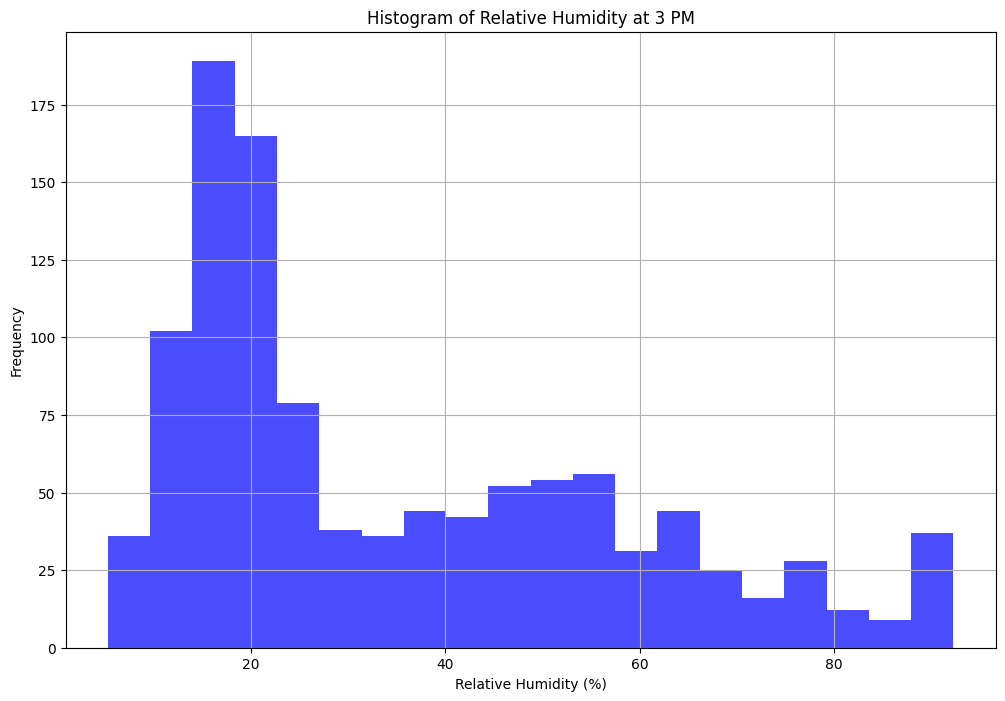

In [130]:
plt.figure(figsize=(12, 8)) #basic histogram of the temperature at 3 PM
plt.hist(df["relative_humidity_3pm"], bins=20, color='blue', alpha=0.7)
plt.title("Histogram of Relative Humidity at 3 PM")
plt.xlabel("Relative Humidity (%)")
plt.ylabel("Frequency")
plt.grid()
plt.show()


7. A weather forecast problem is to predict a measure in a future time using the measurements at earlier moments. For example, the data set contains several measurements at 9am and one measurement `relative_humidity_3pm` at 3pm. It is interesting to know whether we can predict `relative_humidity_3pm` using the values at 9am. This is a typical supervised machine learning problem. Using plots to visualize the relationships between the measurements at 9am and `relative_humidity_3pm`. What do you find? Discuss the impacts of the measurements at 9am to the values of `relaive_humidity_3pm`.

Correlation between 9am and 3pm humidity: 0.88


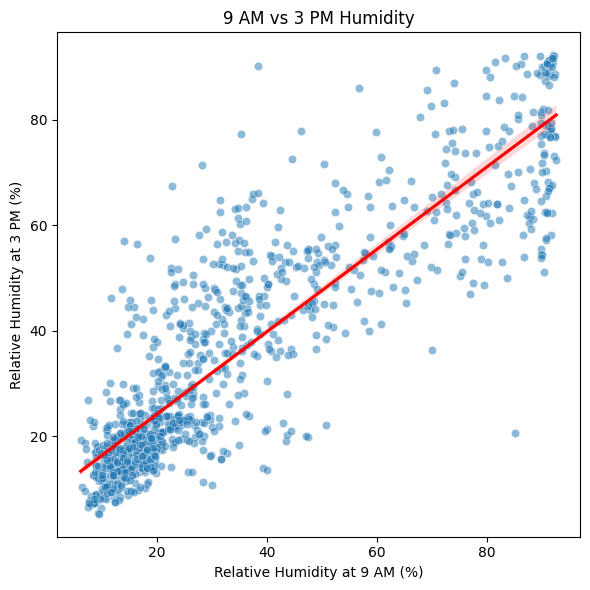

From the scatter plot we can see that 9am and 3pm humidity are correlated.

The strong correlation indicates that we can use a simple linear regression model to predict the 3pm humidity based on the 9am humidity.

Days that start humid are likely to remain humid throughout the day.

Days that start dry are likely to remain dry throughout the day.



In [131]:
import seaborn as sns
hum9 = df["relative_humidity_9am"] #relative humidity at 9 AM
hum3 = df["relative_humidity_3pm"] #relative humidity at 3 PM

corr = hum9.corr(hum3) #calculate the correlation between the two columns
print(f"Correlation between 9am and 3pm humidity: {corr:.2f}") 

plt.figure(figsize=(6,6)) #scatter plot of the two columns with a regression line
sns.scatterplot(x=hum9, y=hum3, alpha=0.5)
sns.regplot(x=hum9, y=hum3, scatter=False, color="red")
plt.xlabel("Relative Humidity at 9 AM (%)")
plt.ylabel("Relative Humidity at 3 PM (%)")
plt.title("9 AM vs 3 PM Humidity")
plt.tight_layout()
plt.show()

print("From the scatter plot we can see that 9am and 3pm humidity are correlated.\n")
print("The strong correlation indicates that we can use a simple linear regression model to predict the 3pm humidity based on the 9am humidity.\n")
print("Days that start humid are likely to remain humid throughout the day.\n")
print("Days that start dry are likely to remain dry throughout the day.\n")


## Question 4 [20 marks]: Download the dataset: `activity-data.csv` and load it into a data frame. The data set contains the time series outputs of a wearable clinical device measuring a patient's activities. Write code to answer the following questions:
1. What is the total number of days covered by the dataset? Provide a list of all the distinct calendar dates on which recordings were made.
2. Can you plot the number of steps against the recording 'Datetime', ensuring that each tick on the x-axis corresponds to a unique date in the dataset?
3. Create a plot that shows the daily average number of steps in comparison with the steps recorded each minute. The plot should clearly differentiate between the daily mean and individual minute measurements.
4. How does the average step count change during 15-minute intervals throughout the day? Compute and plot these averages across all days in the dataset.
5. For each day represented in the dataset, what is the percentage of minutes without records (missing records)? Please calculate and present this data
6. For minutes with missing data, fill in 'Steps', 'XCnt', 'YCnt', 'ZCnt', and 'Calories' using the mean values for those minutes across all days where data is available. Save the completed dataset to a DataFrame named `all_activity_df` with columns for 'Datetime', 'Steps', 'XCnt', 'YCnt', 'ZCnt', and 'Calories'.
7. Could you create plots that illustrate the pairwise relationships between 'Steps', 'XCnt', 'YCnt', 'ZCnt', and 'Calories'? After analyzing these plots, what conclusions can you draw about the relationships and potential correlations between these variables?

## Answers:

1. What is the total number of days covered by the dataset? Provide a list of all the distinct calendar dates on which recordings were made.

In [133]:
df = pd.read_csv("activity-data.csv") #load it

df["Datetime"] = pd.to_datetime(df["Datetime"]) #convert to datetime
df["date"] = df["Datetime"].dt.date #extract date

unique_dates = sorted(df["date"].unique()) #get unique dates
print(f"Total number of days: {len(unique_dates)}")
print("Distinct recording dates:")
for d in unique_dates:
    print(d)

df.head(10)

Total number of days: 23
Distinct recording dates:
2016-06-22
2016-06-23
2016-06-24
2016-06-25
2016-06-26
2016-06-27
2016-06-28
2016-06-29
2016-06-30
2016-07-01
2016-07-02
2016-07-03
2016-07-04
2016-07-05
2016-07-06
2016-07-07
2016-07-08
2016-07-09
2016-07-10
2016-07-11
2016-07-12
2016-07-13
2016-07-14


Datetime       ACTDT  Day  Week      Time  Hour  Minute  Steps  \
0 2016-06-22 09:56:00  06/22/2016  1.0   1.0   9:56:00     9      56      0   
1 2016-06-22 09:57:00  06/22/2016  1.0   1.0   9:57:00     9      57      0   
2 2016-06-22 09:58:00  06/22/2016  1.0   1.0   9:58:00     9      58      0   
3 2016-06-22 09:59:00  06/22/2016  1.0   1.0   9:59:00     9      59      0   
4 2016-06-22 10:00:00  06/22/2016  1.0   1.0  10:00:00    10       0      0   
5 2016-06-22 10:01:00  06/22/2016  1.0   1.0  10:01:00    10       1      0   
6 2016-06-22 10:02:00  06/22/2016  1.0   1.0  10:02:00    10       2      0   
7 2016-06-22 10:03:00  06/22/2016  1.0   1.0  10:03:00    10       3      0   
8 2016-06-22 10:04:00  06/22/2016  1.0   1.0  10:04:00    10       4      0   
9 2016-06-22 10:05:00  06/22/2016  1.0   1.0  10:05:00    10       5      0   

   XCnt  YCnt  ZCnt  Calories  Wear  WearSens        date  
0     0     0     0  0.000000  True         3  2016-06-22  
1     0     0     0  0.000000  True         3  2016-06-22  
2     0     0     0  0.000000  True         3  2016-06-22  
3     0     0     0  0.000000  True         3  2016-06-22  
4     0     0     0  0.000000  True         3  2016-06-22  
5   428   168   196  0.161977  True         2  2016-06-22  
6   831   971  1355  1.632193  True         0  2016-06-22  
7   408   638   711  0.615127  True         1  2016-06-22  
8   922  1980  1582  3.073932  True         1  2016-06-22  
9   371   960   289  1.598174  True         1  2016-06-22

2. Can you plot the number of steps against the recording 'Datetime', ensuring that each tick on the x-axis corresponds to a unique date in the dataset?


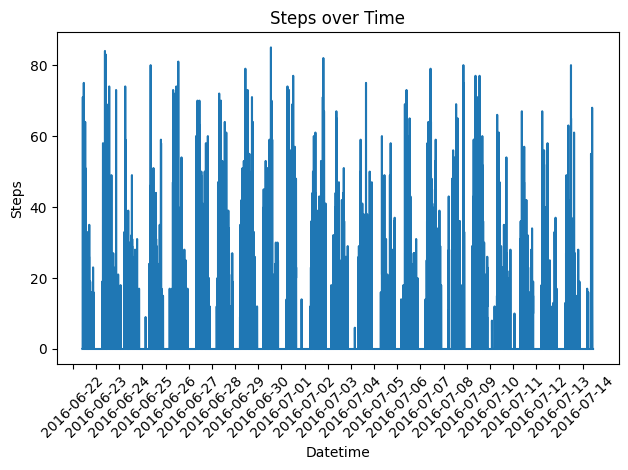

In [136]:
fig, ax = plt.subplots() #plotting the steps over time
ax.plot(df['Datetime'], df['Steps']) 
ax.set_title('Steps over Time')
ax.set_xlabel('Datetime')
ax.set_ylabel('Steps')
midnights = pd.date_range(start=df['date'].min(), end=df['date'].max(), freq='D') #create a midnight range for the x-axis
ax.set_xticks(midnights) #set the x-ticks to the midnights of each day
ax.set_xticklabels([d.strftime('%Y-%m-%d') for d in midnights], rotation=45)
plt.tight_layout()
plt.show()

3. Create a plot that shows the daily average number of steps in comparison with the steps recorded each minute. The plot should clearly differentiate between the daily mean and individual minute measurements.

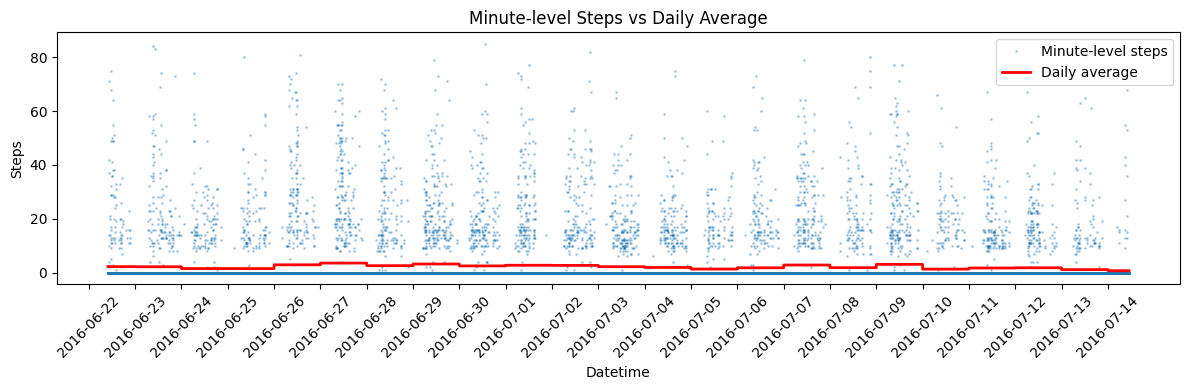

In [144]:
daily_avg = df.groupby('date')['Steps'].mean() #calculate the daily average steps
df['daily_avg'] = df['date'].map(daily_avg) #map the daily average to the original dataframe

fig, ax = plt.subplots(figsize=(12, 4)) #plotting
ax.plot(df['Datetime'], df['Steps'], '.', alpha=0.3, markersize=2, label='Minute-level steps') #plot the steps by minute 
ax.plot(df['Datetime'], df['daily_avg'], '-', color='red', linewidth=2, label='Daily average') #plot the daily average steps

ax.set_title('Minute-level Steps vs Daily Average') #graph formatting, and using the midnights for x-axis from before
ax.set_xlabel('Datetime')
ax.set_ylabel('Steps')
ax.set_xticks(midnights)
ax.set_xticklabels([d.strftime('%Y-%m-%d') for d in midnights], rotation=45)
ax.legend()
plt.tight_layout()
plt.show()

4. How does the average step count change during 15-minute intervals throughout the day? Compute and plot these averages across all days in the dataset.

/var/folders/y5/p76rbs_970ncmr_sbfcnmnrw0000gn/T/ipykernel_94330/2820246557.py:1: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_15 = df.set_index('Datetime').resample('15T')['Steps'].mean().reset_index() #resample the data to 15 minute intervals and calculate the mean steps


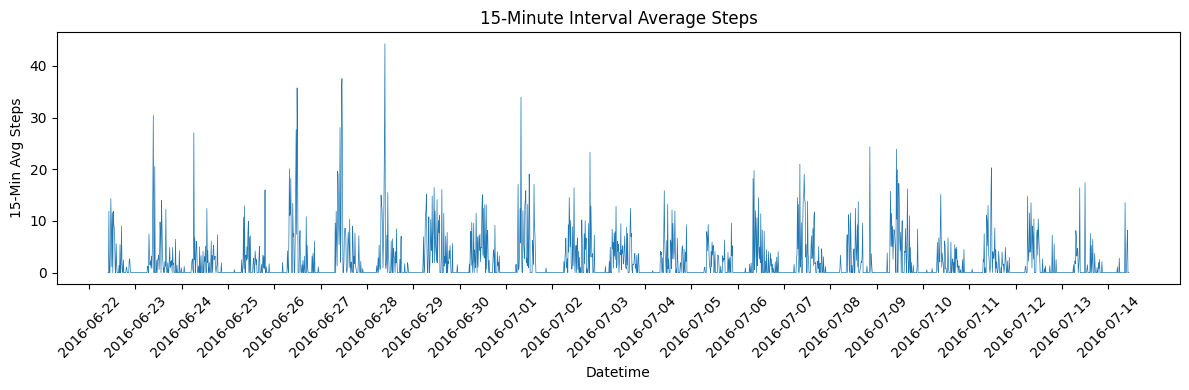

In [150]:
df_15 = df.set_index('Datetime').resample('15T')['Steps'].mean().reset_index() #resample the data to 15 minute intervals and calculate the mean steps
fig, ax = plt.subplots(figsize=(12, 4)) #plotting
ax.plot(df_15['Datetime'], df_15['Steps'], lw=0.5) #plot the 15 minute average steps
ax.set_title('15-Minute Interval Average Steps') #graph formatting
ax.set_xlabel('Datetime')
ax.set_ylabel('15-Min Avg Steps')
ax.set_xticks(midnights) #use the midnights for x-axis, from before
ax.set_xticklabels([d.strftime('%Y-%m-%d') for d in midnights], rotation=45)
plt.tight_layout()
plt.show()

5. For each day represented in the dataset, what is the percentage of minutes without records (missing records)? Please calculate and present this data

In [152]:
missing_pct = df.groupby('date').apply(lambda x: x.isnull().sum() / len(x) * 100) #group by date and calculate the percentage of missing values for each day
print("\nPercentage of missing values per day (%):") 
print(missing_pct)


Percentage of missing values per day (%):
            Datetime  ACTDT  Day   Week  Time  Hour  Minute  Steps  XCnt  \
date                                                                       
2016-06-22       0.0    0.0  0.0    0.0   0.0   0.0     0.0    0.0   0.0   
2016-06-23       0.0    0.0  0.0    0.0   0.0   0.0     0.0    0.0   0.0   
2016-06-24       0.0    0.0  0.0    0.0   0.0   0.0     0.0    0.0   0.0   
2016-06-25       0.0    0.0  0.0    0.0   0.0   0.0     0.0    0.0   0.0   
2016-06-26       0.0    0.0  0.0    0.0   0.0   0.0     0.0    0.0   0.0   
2016-06-27       0.0    0.0  0.0    0.0   0.0   0.0     0.0    0.0   0.0   
2016-06-28       0.0    0.0  0.0    0.0   0.0   0.0     0.0    0.0   0.0   
2016-06-29       0.0    0.0  0.0    0.0   0.0   0.0     0.0    0.0   0.0   
2016-06-30       0.0    0.0  0.0    0.0   0.0   0.0     0.0    0.0   0.0   
2016-07-01       0.0    0.0  0.0    0.0   0.0   0.0     0.0    0.0   0.0   
2016-07-02       0.0    0.0  0.0    0.0   0.0

/var/folders/y5/p76rbs_970ncmr_sbfcnmnrw0000gn/T/ipykernel_94330/1487502924.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_pct = df.groupby('date').apply(lambda x: x.isnull().sum() / len(x) * 100) #group by date and calculate the percentage of missing values for each day


6. For minutes with missing data, fill in 'Steps', 'XCnt', 'YCnt', 'ZCnt', and 'Calories' using the mean values for those minutes across all days where data is available. Save the completed dataset to a DataFrame named `all_activity_df` with columns for 'Datetime', 'Steps', 'XCnt', 'YCnt', 'ZCnt', and 'Calories'.


In [157]:
df_filled = df.copy() #copy of the original dataframe to fill missing values
for col in ["Steps", "XCnt", "YCnt", "ZCnt", "Calories"]: #for each column we want to fill missing values
    df_filled[col] = df_filled[col].fillna( #calculate the mean of the column for each day and fill missing values with that
        df_filled.groupby("time_only")[col].transform("mean")
    )

all_activity_df = df_filled[["Datetime", "Steps", "XCnt", "YCnt", "ZCnt", "Calories"]].copy() #select the columns we want to show
all_activity_df.head()

Datetime  Steps  XCnt  YCnt  ZCnt  Calories
0 2016-06-22 09:56:00      0     0     0     0       0.0
1 2016-06-22 09:57:00      0     0     0     0       0.0
2 2016-06-22 09:58:00      0     0     0     0       0.0
3 2016-06-22 09:59:00      0     0     0     0       0.0
4 2016-06-22 10:00:00      0     0     0     0       0.0

7. Could you create plots that illustrate the pairwise relationships between 'Steps', 'XCnt', 'YCnt', 'ZCnt', and 'Calories'? After analyzing these plots, what conclusions can you draw about the relationships and potential correlations between these variables?

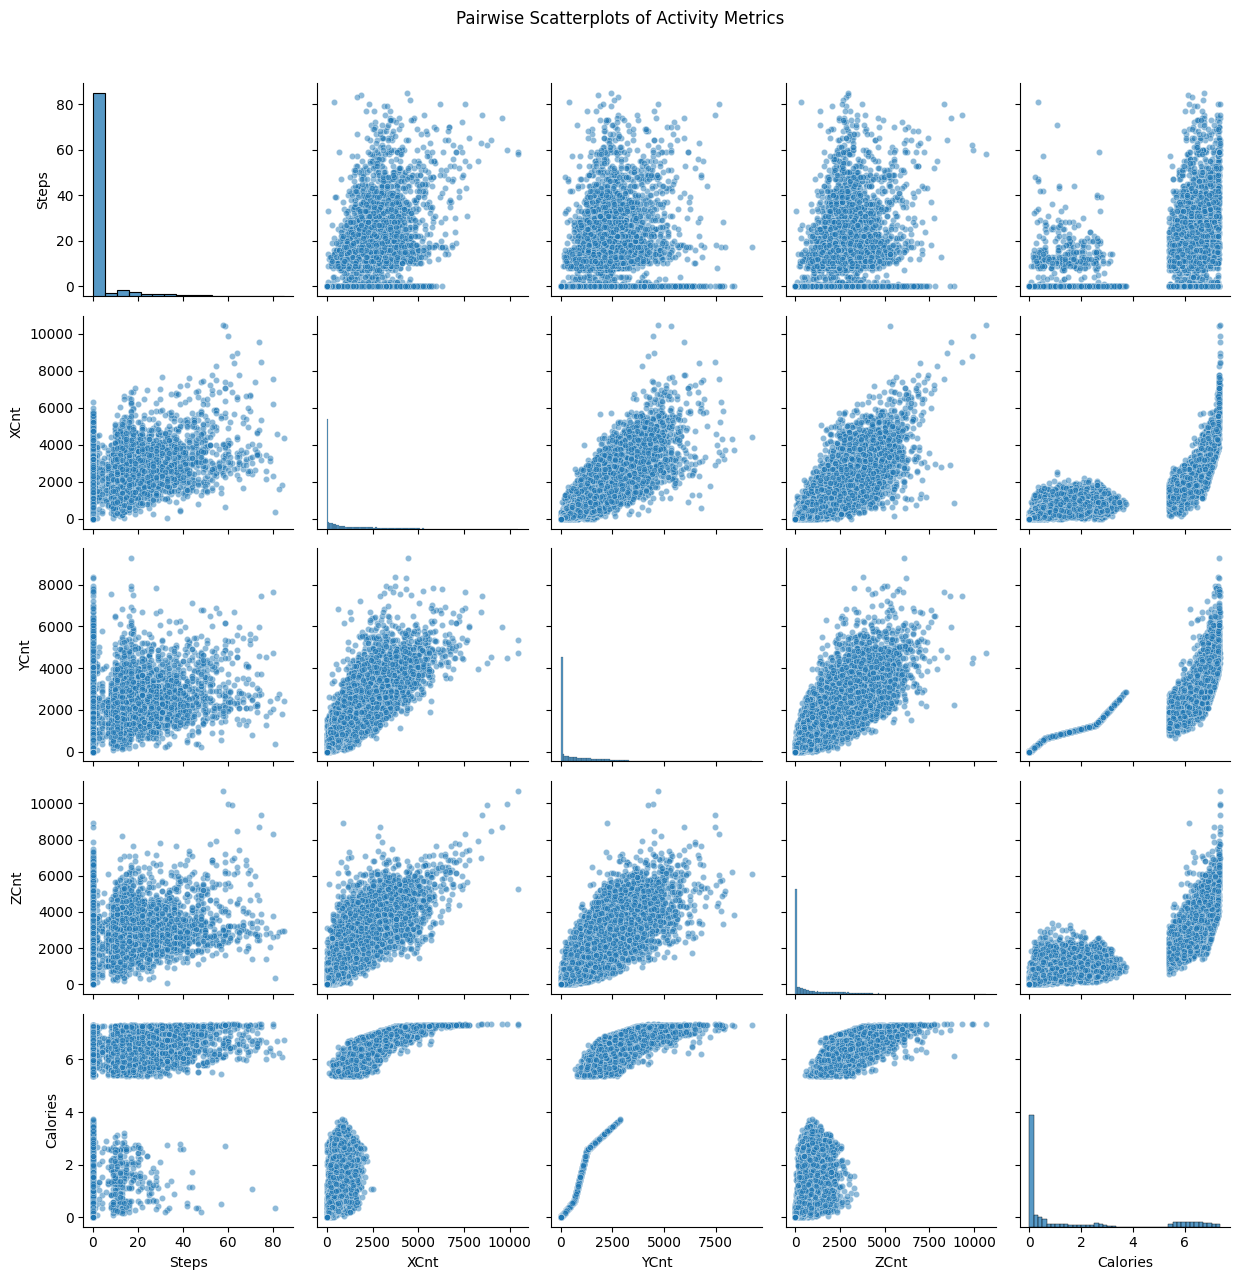

Conclusion:
steps, X/Y/Z counts and Calories are all positively correlated, with some caviats
XCnt/YCnt/ZCnt show the strongest inter‐correlations
calories tracks well with overall activity, but does have an oditty of showing a confusing correlation with setps, but that could be explained by the fact that steps are not the only factor in calculating calories burned


In [161]:
import seaborn as sns

sns.pairplot( #plotting pairwise scatterplots of the activity metrics
    all_activity_df.dropna(),
    vars=["Steps", "XCnt", "YCnt", "ZCnt", "Calories"],
    plot_kws={"alpha": 0.5, "s": 20},
)
plt.suptitle("Pairwise Scatterplots of Activity Metrics", y=1.02) #formatting the plot
plt.tight_layout()
plt.show()

print("Conclusion:")
print("steps, X/Y/Z counts and Calories are all positively correlated, with some caviats")
print("XCnt/YCnt/ZCnt show the strongest inter‐correlations")
print("calories tracks well with overall activity, but does have an oditty of showing a confusing correlation with setps, but that could be explained by the fact that steps are not the only factor in calculating calories burned")